<h1 style="font-size:40px;"><b>Student Performance Predictor(Beginner)
    🔥</b></h1>

In [59]:
import pandas as pd

In [60]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

In [63]:
from sklearn.linear_model import LinearRegression

# Renaming and All Stuff

In [51]:
df = pd.read_csv('StudentsPerformance.csv')  
print(df.columns.tolist())
df.rename(columns={
    'gender': 'Gender',
    'race/ethnicity': 'Race/Ethnicity',
    'parental level of education': 'Parental level of Education',
    'lunch': 'Lunch',
    'test preparation course': 'Test Prepration Course',
    'math score': 'Math Score',
    'reading score': 'Reading Score',
    'writing score': 'Writing Score'
}, inplace=True)

print(df.head())


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
   Gender Race/Ethnicity Parental level of Education         Lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  Test Prepration Course  Math Score  Reading Score  Writing Score  
0                   none          72             72             74  
1              completed          69             90             88  
2                   none          90             95             93  
3                   none          47             57             44  
4                   none          76             78             75  


## # Encode the categorical variables using your custom column names

In [67]:

df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})
df['Lunch'] = df['Lunch'].map({'free/reduced': 0, 'standard': 1})
df['Test Prepration Course'] = df['Test Prepration Course'].map({'none': 0, 'completed': 1})

# Encode race and parental education simply
df['Race/Ethnicity'] = df['Race/Ethnicity'].astype('category').cat.codes
df['Parental level of Education'] = df['Parental level of Education'].astype('category').cat.codes
print(df.head())


   Gender  Race/Ethnicity  Parental level of Education  Lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   Test Prepration Course  Math Score  Reading Score  Writing Score  
0                       0          72             72             74  
1                       1          69             90             88  
2                       0          90             95             93  
3                       0          47             57             44  
4                       0          76             78             75  


## # Features and target

In [33]:

X = df.drop(columns=['Math Score'])
y = df['Math Score']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [68]:
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score:.2f}")

R² Score: 0.88


# # Plot 1: Predicted vs Actual

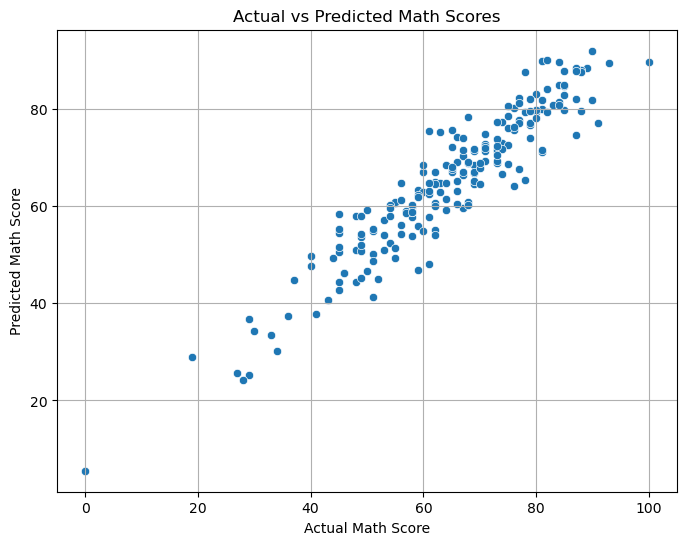

In [69]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()


# # Plot 2: Residuals (Errors)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


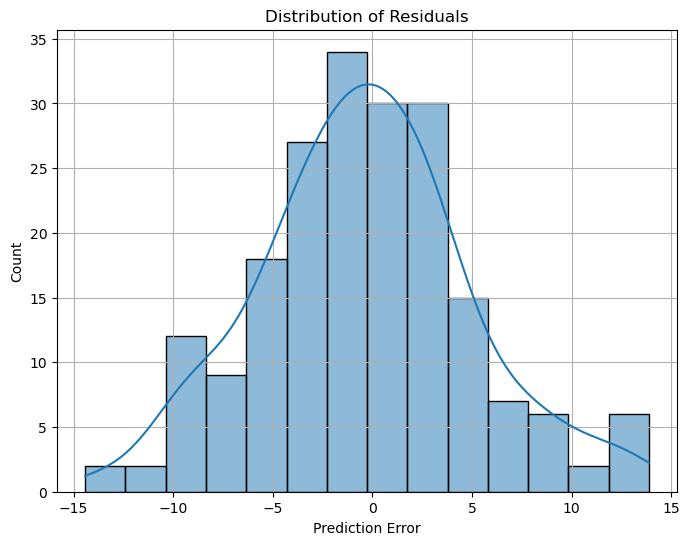

In [70]:

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.show()